# Exam MAE1 2021 : 3D ISAE billiard 

The duration of this exam is **2 hours**. You can use an ISAE computer or your own computer. You have access to Internet without any restriction. So it is allowed to use informations from web sites concerning Python. You can also use the notebooks and the Python files you have developped during this course.   

However, any communication during the exam is **totally forbidden**. If any evidence of any type of communication with another student or with anyone is found during or after the exam, the student(s) will have the mark 0/20. 

Note that the level of the questions is variable. So do not spend too much time on an exercice and try to do the next ones... The exam is deliberately long (for 2 hours) and the notation will be defined accordingly.  

This exam contains two parts. The first one is on the management of the json files and the second one is on Vpython. Even if they concern the same subject, these two parts are independant.   


Tip : the exam contains several Vpython windows. In order to avoid to restart the kernel at each run, try to first stop each run of a program in the head of the page before launching the next one.    



Your main work is to build a class Ball which can be used to play on the billiard table defined in the next cell :

In [1]:
from __future__ import division, print_function
from vpython import *

# dimensions of the table
L = 254 # length
W = 128 # width
H = 10 # height

scene=canvas(title="Billard")
#scene.camera.pos = vector(0, 75, 0) 

# ground
box0 = box(pos = vector(0, -H/2, 0), width = W, length = L, height = H, color = color.green)

# limits of the table
box1 = box(pos = vector(-L/2 - H/2, H/2, 0),width = W ,length = H, height = H,color = color.red)
box2 = box(pos = vector(L/2 + H/2, H/2, 0),width = W ,length = H, height = H,color = color.yellow) 
box3 = box(pos = vector(0, H/2, -W/2 - H/2),width = H ,length = L, height = H,color = color.blue)
box4 = box(pos = vector(0, H/2, W/2 + H/2),width = H ,length = L, height = H,color = color.orange)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Part 1

### Exercice 1.1

Create a class Ball_v1 having just the function __init__ allowing to create an object with the following parameters :
- pos : a vector defining its position
- radius : the radius of the ball
- speed : a vector defining the initial speed of the ball
- color : the color of the ball
(like for the satellites, you must use a sphere object of vpython.)



In [2]:
class Ball_v1:

    # class ball
    def __init__(self, pos, radius, speed, color ):
        self.pos=pos
        self.radius=radius
        self.speed=speed
        self.color=color
        self.s = sphere(pos=pos,radius=radius,color=color)


### Exercice 1.2

To manage the game, we wish to store or to load the configuration of a billiard game. For that, we want to use json files. An example of such file is the file billiard_conf1.json on the LMS. Load it and store it on a directory data. 

Basically, this file contains a field giving the number of balls and a list of balls, each one being characterized by its parameters. Note that the colors are represented by a list of 3 reals in the range [0,1].

Define a function that load a configuration file and return the corresponding dictionary.  

In [3]:
import json

def loadConfiguration(path):
    data_file = open(path)
    json_string = data_file.read()
    config_dictionary = json.loads(json_string)
    return config_dictionary

my_dict = loadConfiguration("data/billiard_conf1.json")
print(my_dict)

{'nb_balls': 3, 'balls': [{'pos': [50, 5.5, 20], 'radius': 5.5, 'speed': [10, 0, 0], 'color': [0, 0, 0]}, {'pos': [-60, 5.5, 10], 'radius': 5.5, 'speed': [10, 0, 10], 'color': [1, 0, 0.5]}, {'pos': [0, 5.5, 10], 'radius': 5.5, 'speed': [10, 0, 10], 'color': [0.2, 0.5, 0.7]}]}


### Exercice 1.3

Verify that the value of the field nb_balls corresponds to the number of balls stored in the list of balls.

In [ ]:
my_dict['nb_balls']

### Exercice 1.4

Write the function build_ball which consider as input a dictionary representing a ball (in the format used in the json file - see the example below) and build and return an object of the class Ball_v1.  

Note that in Vpython, a color can be represented by a vector of 3 reals in the range [0,1]. Please, use this representation to build your object.

In [4]:
ball_dict = { 
            "pos" : [30,5.5,10],
            "radius" : 5.5,
            "speed" : [10,0,0],
            "color" : [0.8,0.6 ,0.6]
        }

def build_ball(ball_dict) :
    pos = vector(ball_dict['pos'][0],ball_dict['pos'][1],ball_dict['pos'][2])
    radius = ball_dict['radius']
    speed = vector(ball_dict['speed'][0],ball_dict['speed'][1],ball_dict['speed'][2])
    color = vector(ball_dict['color'][0],ball_dict['color'][1],ball_dict['color'][2])
    obj = Ball_v1(pos,radius,speed,color)
    return obj

### Exercice 1.5

By using the previous function, create the list of Ball_v1 objects corresponding to the data of the file billiard_conf1.json . 

In [6]:
from __future__ import division, print_function
from vpython import *

# dimensions of the table
L = 254 # length
W = 128 # width
H = 10 # height

scene=canvas(title="Billard")
#scene.camera.pos = vector(0, 75, 0) 

# ground
box0 = box(pos = vector(0, -H/2, 0), width = W, length = L, height = H, color = color.green)

# limits of the table
box1 = box(pos = vector(-L/2 - H/2, H/2, 0),width = W ,length = H, height = H,color = color.red)
box2 = box(pos = vector(L/2 + H/2, H/2, 0),width = W ,length = H, height = H,color = color.yellow) 
box3 = box(pos = vector(0, H/2, -W/2 - H/2),width = H ,length = L, height = H,color = color.blue)
box4 = box(pos = vector(0, H/2, W/2 + H/2),width = H ,length = L, height = H,color = color.orange)


list_balls = []
for i in range(my_dict['nb_balls']):
    ball = build_ball(my_dict['balls'][i])
    list_balls.append(ball)

<IPython.core.display.Javascript object>

## Part 2  

### Exercice 2.1

Create a class Ball_v2 having the same function __init__  than Ball_v1 and another function **updatePosition**.
This function, which has a parameter dt corresponding to a time step, updates the position of the ball. 

We assume that there is a small friction between the ball and the table. This friction is implemented by updating the speed of the ball by multipying it at each time step by a friction coefficient equal to 0.999. This must be done in the function updatePosition. After that, the position of the ball is updated with the new speed and the time step.

In [7]:
friction_coeff = 0.999

class Ball_v2:

    # class ball
    def __init__(self, pos, radius, speed, color):
        self.pos=pos
        self.radius=radius
        self.speed=speed
        self.color=color
        self.s = sphere(pos=pos,radius=radius,color=color)
        
    def updatePosition(self,dt):
        while self.speed>0:
            self.speed = mag(self.speed)*friction_coeff*norm(self.speed)
            self.pos = self.pos + self.speed*dt
            self.s.pos = self.pos

### Exercice 2.2

In the class Ball_v3, modify the function **updatePosition** in order to stop the ball when it reaches a wall (a limit of the table). You can detect it by evaluating the value of the "x" and "z" parameters of the pos of the sphere. 

Evaluate your ball on the following scene. 

In [8]:
from __future__ import division, print_function
from vpython import *

scene=canvas(title="Billard")
#scene.camera.pos = vector(0, 75, 0) 

# dimensions of the table
L = 254 # length
W = 128 # width
H = 10 # height
ball_radius = 5.5

friction_coeff = 0.999

class Ball_v3:

    # class ball
    def __init__(self, pos, radius, speed, color):
        self.pos=pos
        self.radius=radius
        self.speed=speed
        self.color=color
        self.s = sphere(pos=pos,radius=radius,color=color)
    
    def updatePosition(self,dt):
        while mag(self.speed)>0 and self.pos.x<=abs(L/2-self.radius) and self.pos.z<=abs(H/2-self.radius):
            self.speed = mag(self.speed)*friction_coeff*norm(self.speed)
            self.pos = self.pos + self.speed*dt
            self.s.pos = self.pos

              
# ground
box0 = box(pos = vector(0, -H/2, 0), width = W, length = L, height = H, color = color.green)

# limits of the table
box1 = box(pos = vector(-L/2 - H/2, H/2, 0),width = W ,length = H, height = H,color = color.red)
box2 = box(pos = vector(L/2 + H/2, H/2, 0),width = W ,length = H, height = H,color = color.yellow) 
box3 = box(pos = vector(0, H/2, -W/2 - H/2),width = H ,length = L, height = H,color = color.blue)
box4 = box(pos = vector(0, H/2, W/2 + H/2),width = H ,length = L, height = H,color = color.orange)


# construction of the ball
ball3 = Ball_v3(pos=vector(0,ball_radius,0),radius=ball_radius, speed=vector(100,0,90), color=color.white)          

# launch the animation
dt = 0.01
while True:
    rate(50)
    ball3.updatePosition(dt)

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

### Exercice 2.3

Modify the updatePosition in order to implement the rebound of a ball on the wall. 

Tip : A simple way to obtain the new speed vector is to rotate the speed by an angle pi around an axis parallel to the wall. Another (different) solution is to use a normalized vector **n** orthogonal to the wall and parallel to the table. If **v** denotes the speed vector of the ball, the speed **V** of the ball after the rebound is equal to **v** - 2 $*$ dot(**v**,**n**) $*$ **n**   


In [ ]:
from __future__ import division, print_function
from vpython import *

class Ball_v4:

    # class ball
    def __init__(self, pos, radius, speed, color):
        self.pos=pos
        self.radius=radius
        self.speed=speed
        self.color=color
        self.s = sphere(pos=pos,radius=radius,color=color)
    
    def updatePosition(self,dt):
        if abs(self.s.pos.x)<L/2-self.s.radius and abs(self.s.pos.z)<H/2-self.s.radius:
            self.speed = mag(self.speed)*friction_coeff*norm(self.speed)
            #self.pos = self.pos
            self.s.pos = self.pos + self.speed*dt
        elif abs(self.s.pos.x)<L/2-self.s.radius:
            if self.s.pos.x>0:
                n = vector(-self.s.pos.x-self.s.radius,0,0)
                self.speed = norm(self.speed - 2*dot(self.speed,n)*n)
            elif self.s.pos.x<0:
                n = vector(self.s.pos.x+self.s.radius,0,0)
                self.speed = norm(self.speed - 2*dot(self.speed,n)*n)
        elif abs(self.s.pos.z<H/2-self.s.radius):
            if self.s.pos.z>0:
                n = vector(0,0,-self.s.pos.z-self.s.radius)
                self.speed = norm(self.speed - 2*dot(self.speed,n)*n)
            elif self.s.pos.z<0:
                n = vector(0,0,self.s.pos.z+self.s.radius)
                self.speed = norm(self.speed - 2*dot(self.speed,n)*n)
            
            
              
scene=canvas(title="Billard")
#scene.camera.pos = vector(0, 75, 0) 

# dimensions of the table
L = 254 # length
W = 128 # width
H = 10 # height
ball_radius = 5.5

friction_coeff = 0.999

# ground
box0 = box(pos = vector(0, -H/2, 0), width = W, length = L, height = H, color = color.green)

# limits of the table
box1 = box(pos = vector(-L/2 - H/2, H/2, 0),width = W ,length = H, height = H,color = color.red)
box2 = box(pos = vector(L/2 + H/2, H/2, 0),width = W ,length = H, height = H,color = color.yellow) 
box3 = box(pos = vector(0, H/2, -W/2 - H/2),width = H ,length = L, height = H,color = color.blue)
box4 = box(pos = vector(0, H/2, W/2 + H/2),width = H ,length = L, height = H,color = color.orange)


# construction of the ball
ball4 = Ball_v4(pos=vector(0,ball_radius,0),radius=ball_radius, speed=vector(100,0,90), color=color.white)
            
            
# launch the animation
dt = 0.01     
while True:
    rate(50)
    ball4.updatePosition(dt)

### Exercice 2.4 : 

The objective of this exercice is to manage the collisions between the balls. 

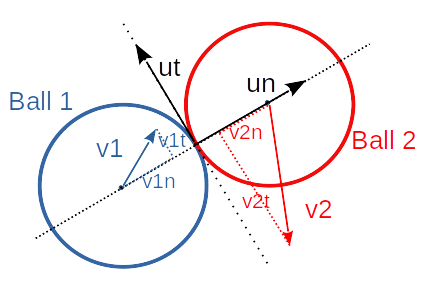

As shown in the figure, the simplest way to compute the new speeds of the balls after the collision is to consider the projections of the speeds on the vectors **un** and **ut** :
- **un** (unit normal) is a normalized vector on the line relying the centers of the balls at the collision(tip : use the norm function to obtain un)
- **ut** (unit tangent) is a normalized vector orthogonal to un (tip: ut is a rotation of un)

First, you need to compute the projections of the speeds of the balls on **un** and **ut**. For that, you just need to compute the dot product between the vector (**un** or **ut**) and the considered speed, denoted by **v1** or **v2**. 
Let us denote by **v1n** and **v1t** (resp. **v2n** and **v2t**) the projections of **v1** (resp. **v2**) on **un** and **ut**. 

To obtain the speeds of the balls after the collision (denoted by **V1** and **V2**), you first need to compute their projections on **un** and **ut**. Let us denote by **V1n** and **V1t** (resp. **V2n** and **V2t**) the projections of **V1** (resp. **V2**) on **un** and **ut**.

By assuming that the collision is elastic, it can be shown that :
- **V1n** = **v2n**
- **V2n** = **v1n**
- **V1t** = **v1t** 
- **V2t** = **v2t**

Then, you can obtain **V1** = **V1n**$*$**un** + **V1t**$*$**ut** and **V2** = **V2n**$*$**un** + **V2t**$*$**ut**.

Define a function **manage_collision(ball1,ball2)** (out of the Class Ball) and test it with two balls defined as follows :

first_ball = Ball_v5(pos=vector(0,ball_radius,0),radius=ball_radius, speed=vector(100,0,0), color=color.white)<br>
second_ball = Ball_v5(pos=vector(100,ball_radius,1),radius=ball_radius, speed=vector(-100,0,-1), color=color.black)


In [ ]:
def manage_collision(ball1, ball2) :
    


### Exercice 2.5

Add to the billiard table 6 holes : 4 in the 4 corners, and 2 in the middle of the long side. 

In practical, a hole represented by a "flat" cylinder (i.e. with very small length). The 6 objects holes will be stored in a list to facilitate their management.  

Modify your **updatePosition** function to simulate the fall of a ball in the hole. In practical, when the program detects that the ball must fall, it makes it invisible (ball.s.visible = False). 


In [ ]:
from __future__ import division, print_function
from vpython import *

scene=canvas(title="Billard")
scene.camera.pos = vector(0, 75, 0) 

# dimensions of the table
L = 254 # length
W = 128 # width
H = 10 # height
ball_radius = 5.5

friction_coeff = 0.999

class Ball_v5:
    # class ball
    def __init__(self, pos, radius, speed, color):
        ...
    
    def updatePosition(self,dt):
        ...

class Hole:

    def __init__(self, pos):
        ...
    
# ground
box0 = box(pos = vector(0, -H/2, 0), width = W, length = L, height = H, color = color.green)

# limits of the table
box1 = box(pos = vector(-L/2 - H/2, H/2, 0),width = W ,length = H, height = H,color = color.red)
box2 = box(pos = vector(L/2 + H/2, H/2, 0),width = W ,length = H, height = H,color = color.yellow) 
box3 = box(pos = vector(0, H/2, -W/2 - H/2),width = H ,length = L, height = H,color = color.blue)
box4 = box(pos = vector(0, H/2, W/2 + H/2),width = H ,length = L, height = H,color = color.orange)

# holes
listHoles = []
...

# construction of the ball
ball5 = Ball_v5(pos=vector(0,ball_radius,0),radius=ball_radius, speed=vector(100,0,90), color=color.white)
            
            
# launch the animation
dt = 0.01     
while True:
    rate(50)
    ball5.updatePosition(dt)

### Exercice 2.6

Consider the configuration with the 3 balls :

white_ball = Ball_v5(pos=vector(0,ball_radius,0),radius=ball_radius, speed=vector(... , ... , ...), color=color.white)<br>
black_ball = Ball_v5(pos=vector(100,ball_radius,1),radius=ball_radius, speed=vector(0,0,0), color=color.black)<br>
red_ball = Ball_v5(pos=vector(100,ball_radius,1),radius=ball_radius, speed=vector(0,0,0), color=color.red)

The black and the red balls are at rest. 
Find a vector speed for the white ball such that the 3 balls fall in the holes as soon as possible. At the end, print the number of steps (a step is a call to the updatePosition function) needed to put the three balls in the holes. Please keep the magnitude of the speed vector lower than 100.  